In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split

from warnings import filterwarnings
filterwarnings('ignore')
sns.set_style('darkgrid')

# Загрузка файла в нескольких форматах

In [2]:
data_csv = pd.read_csv('possum.csv')
data_excel = pd.read_excel('possum.xls')
data_csv, data_excel = data_csv.drop('case', axis=1), data_excel.drop('case', axis=1)

In [3]:
data_csv

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [4]:
data_excel

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [5]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [6]:
data_csv.shape

(104, 14)

# Обработка некорректных значений

### Пропущенные значения

In [7]:
data_csv.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [8]:
data_csv.dropna(inplace=True)
data_csv.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

### Обработка выбросов с помощью IQR и boxplots

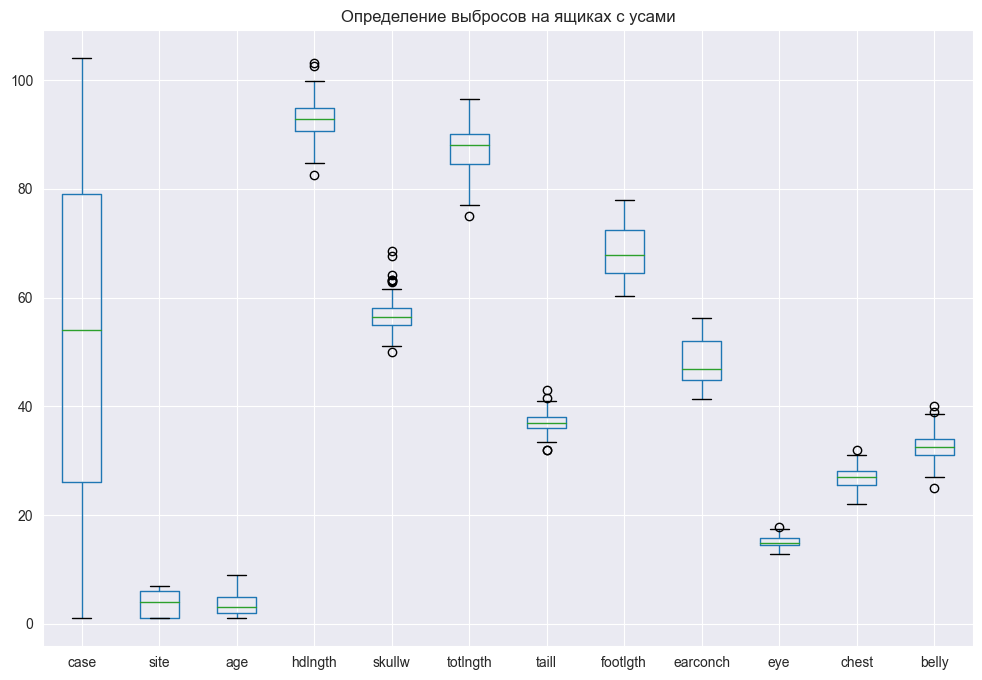

In [9]:
data_csv.boxplot(figsize=(12,8))
plt.title('Определение выбросов на ящиках с усами')
plt.show()

In [10]:
for col in data_csv.columns:
    if col not in ['Pop', 'sex']:
        print(f'Обработали выбросы в {col}')
        Q1 = np.percentile(data_csv[col], 25)
        Q3 = np.percentile(data_csv[col], 75)
        IQR = Q3 - Q1
        high = Q3 + 1.5 * IQR
        low = Q1 - 1.5 * IQR
        data_csv = data_csv[(data_csv[col] >= low) & (data_csv[col] <= high)]
print()
print(f'Текущая форма данных: {data_csv.shape}')

Обработали выбросы в case
Обработали выбросы в site
Обработали выбросы в age
Обработали выбросы в hdlngth
Обработали выбросы в skullw
Обработали выбросы в totlngth
Обработали выбросы в taill
Обработали выбросы в footlgth
Обработали выбросы в earconch
Обработали выбросы в eye
Обработали выбросы в chest
Обработали выбросы в belly

Текущая форма данных: (85, 14)


# Одномерный описательный анализ

### Характеристики

In [11]:
print('Для каждого столбца указывается среднее арифметическое, стандартное отклонение, ' \
      'минимум и максимум, процентили:')
data_csv.describe()

Для каждого столбца указывается среднее арифметическое, стандартное отклонение, минимум и максимум, процентили:


,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,52.035294,3.635294,3.988235,92.612941,56.492941,87.261176,36.970588,68.303529,48.284706,15.040000,26.905882,32.511765
std,31.954747,2.443880,1.899211,2.773205,2.072656,3.600334,1.572367,4.445609,4.157967,0.984547,1.785347,2.416432
min,1.000000,1.000000,1.000000,85.900000,51.000000,80.500000,33.500000,60.300000,41.300000,12.800000,23.000000,27.000000
25%,24.000000,1.000000,3.000000,91.000000,55.000000,85.000000,36.000000,64.400000,44.800000,14.400000,25.500000,31.000000
50%,52.000000,3.000000,4.000000,92.800000,56.300000,88.000000,37.000000,67.900000,47.000000,15.000000,27.000000,32.000000
75%,81.000000,6.000000,5.000000,94.400000,57.900000,89.500000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,104.000000,7.000000,9.000000,99.900000,61.500000,95.500000,40.500000,77.200000,56.200000,17.400000,31.000000,38.500000


### Визуализация

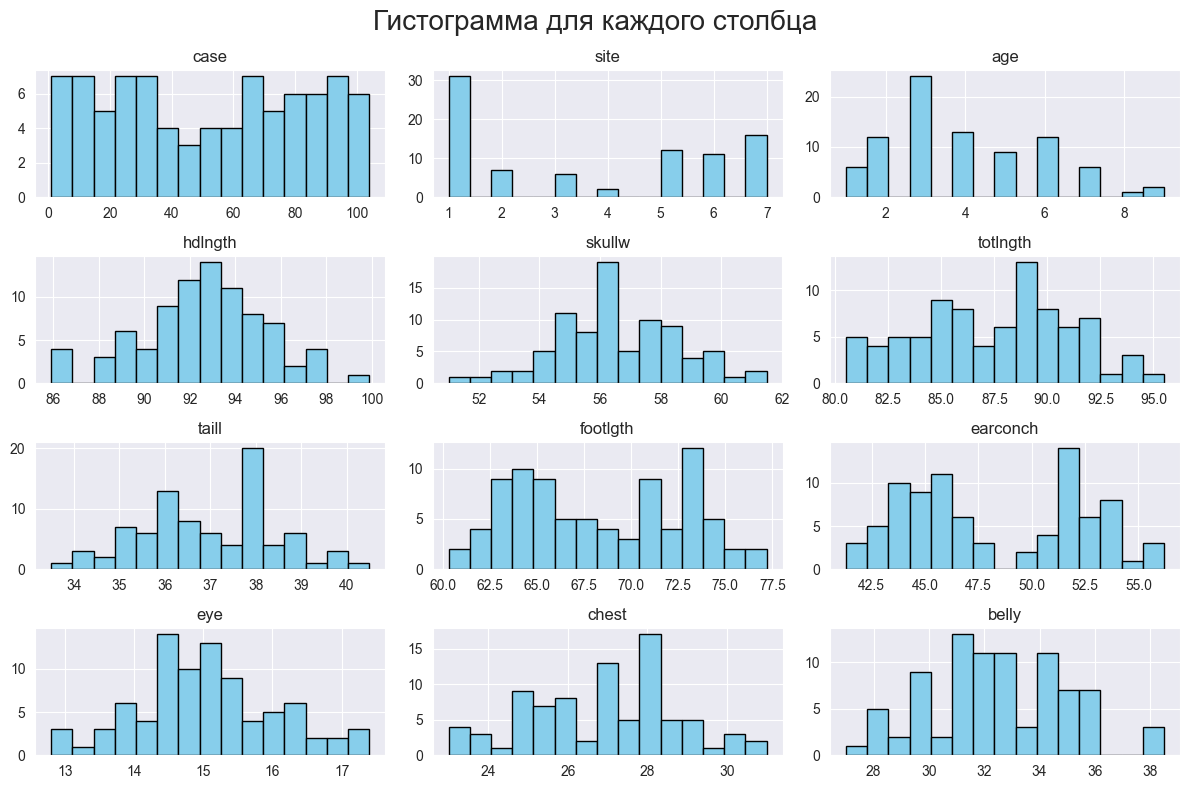

In [12]:
data_csv.hist(figsize=(12, 8), edgecolor='black', bins=15, color='skyblue')
plt.suptitle('Гистограмма для каждого столбца', fontsize=20)
plt.tight_layout()
plt.show()

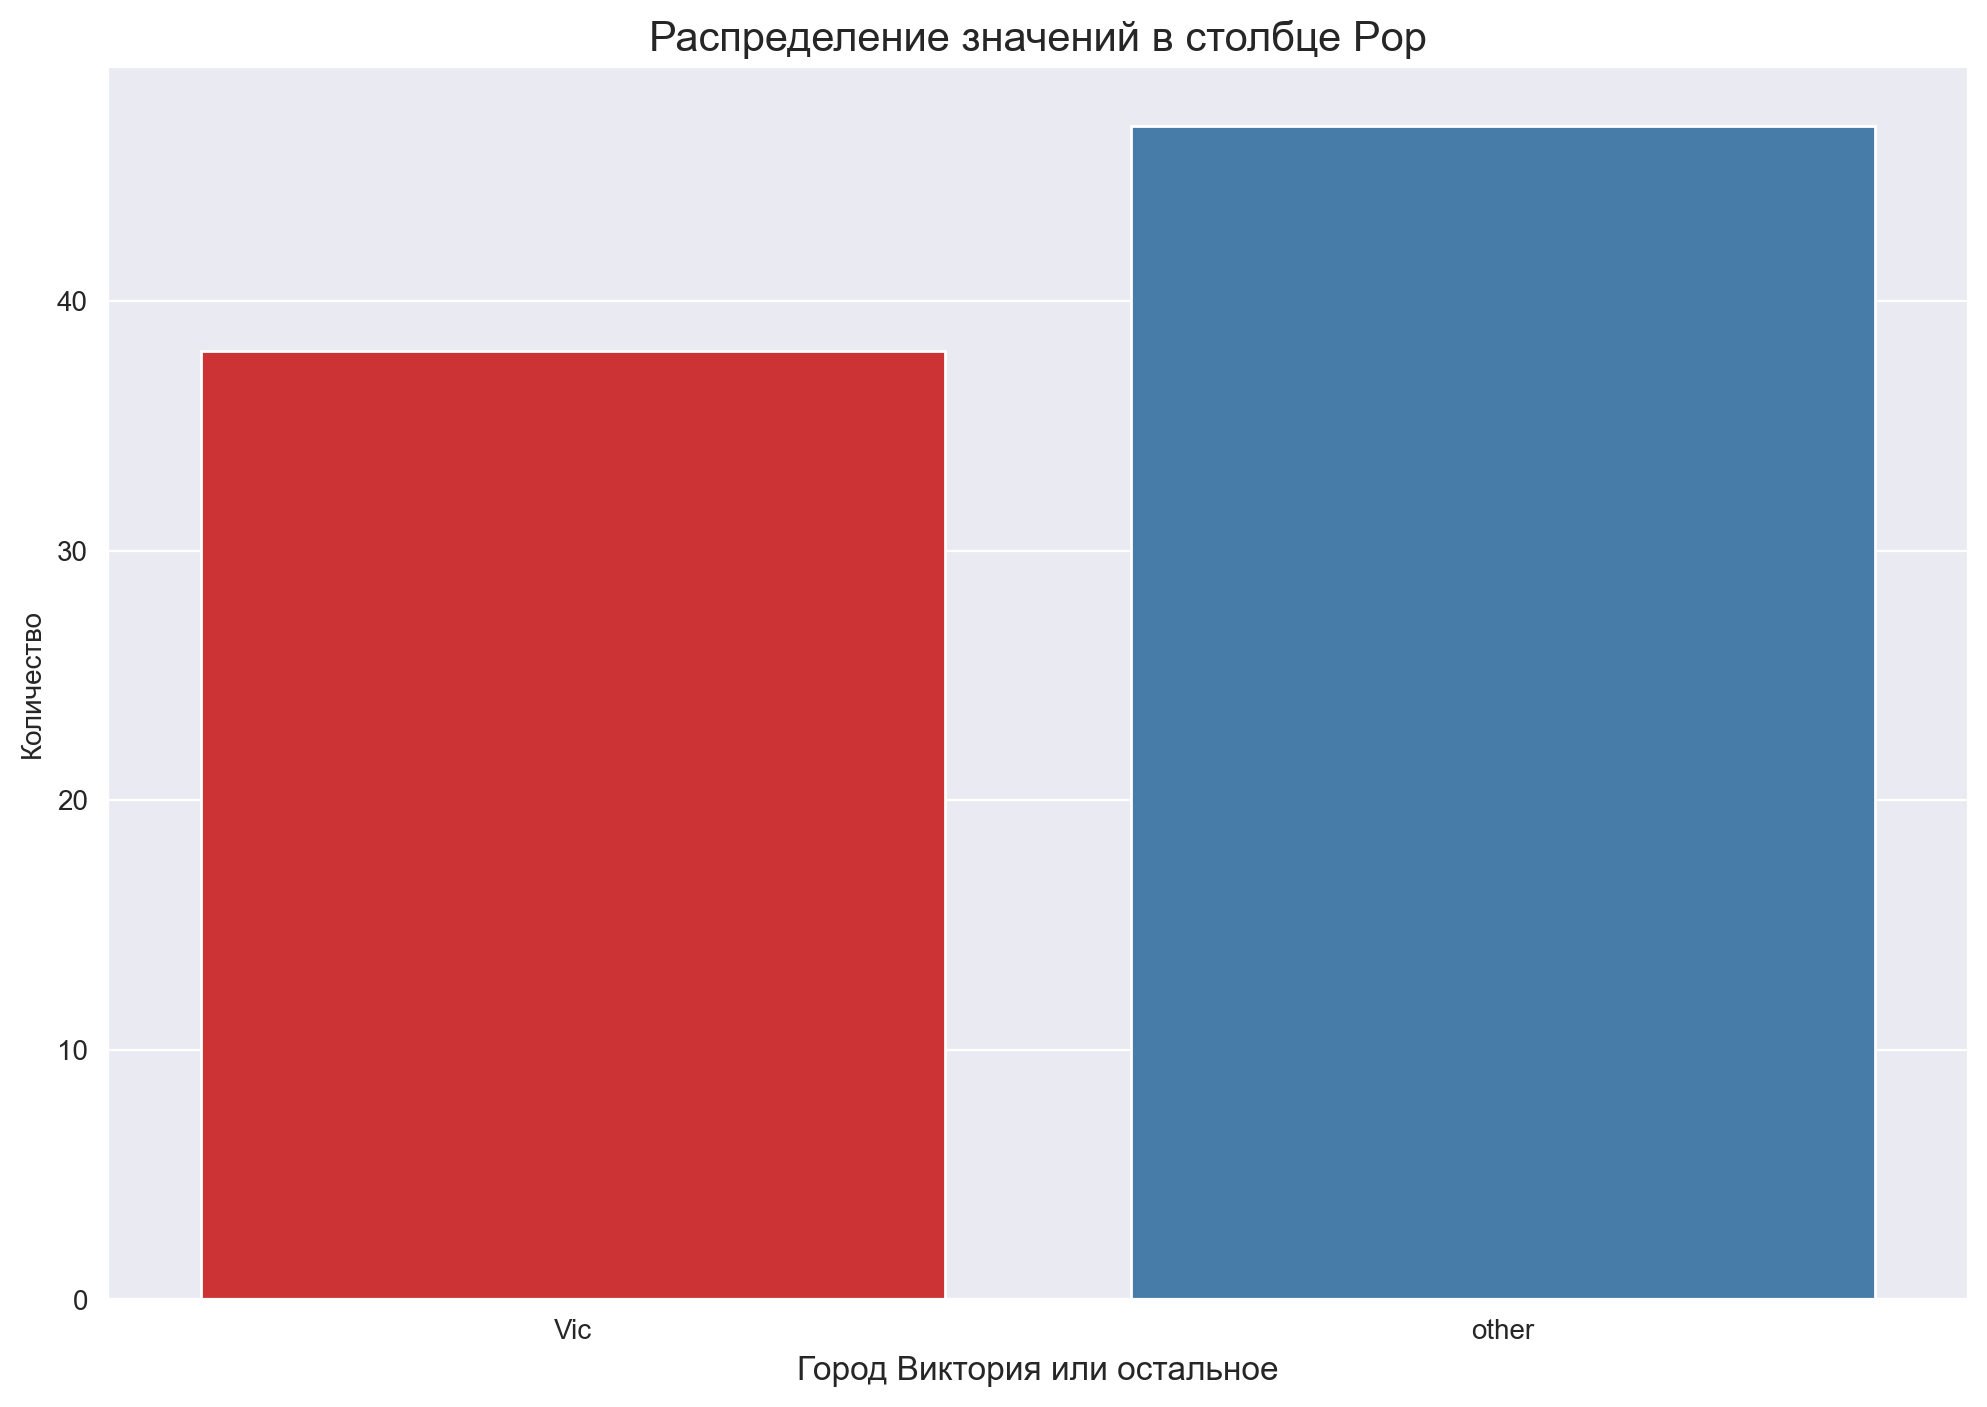

In [13]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(data=data_csv, x='Pop', palette='Set1')
plt.title('Распределение значений в столбце Pop', fontsize=15)
plt.ylabel('Количество')
plt.xlabel('Город Виктория или остальное', fontsize=12)
plt.show()

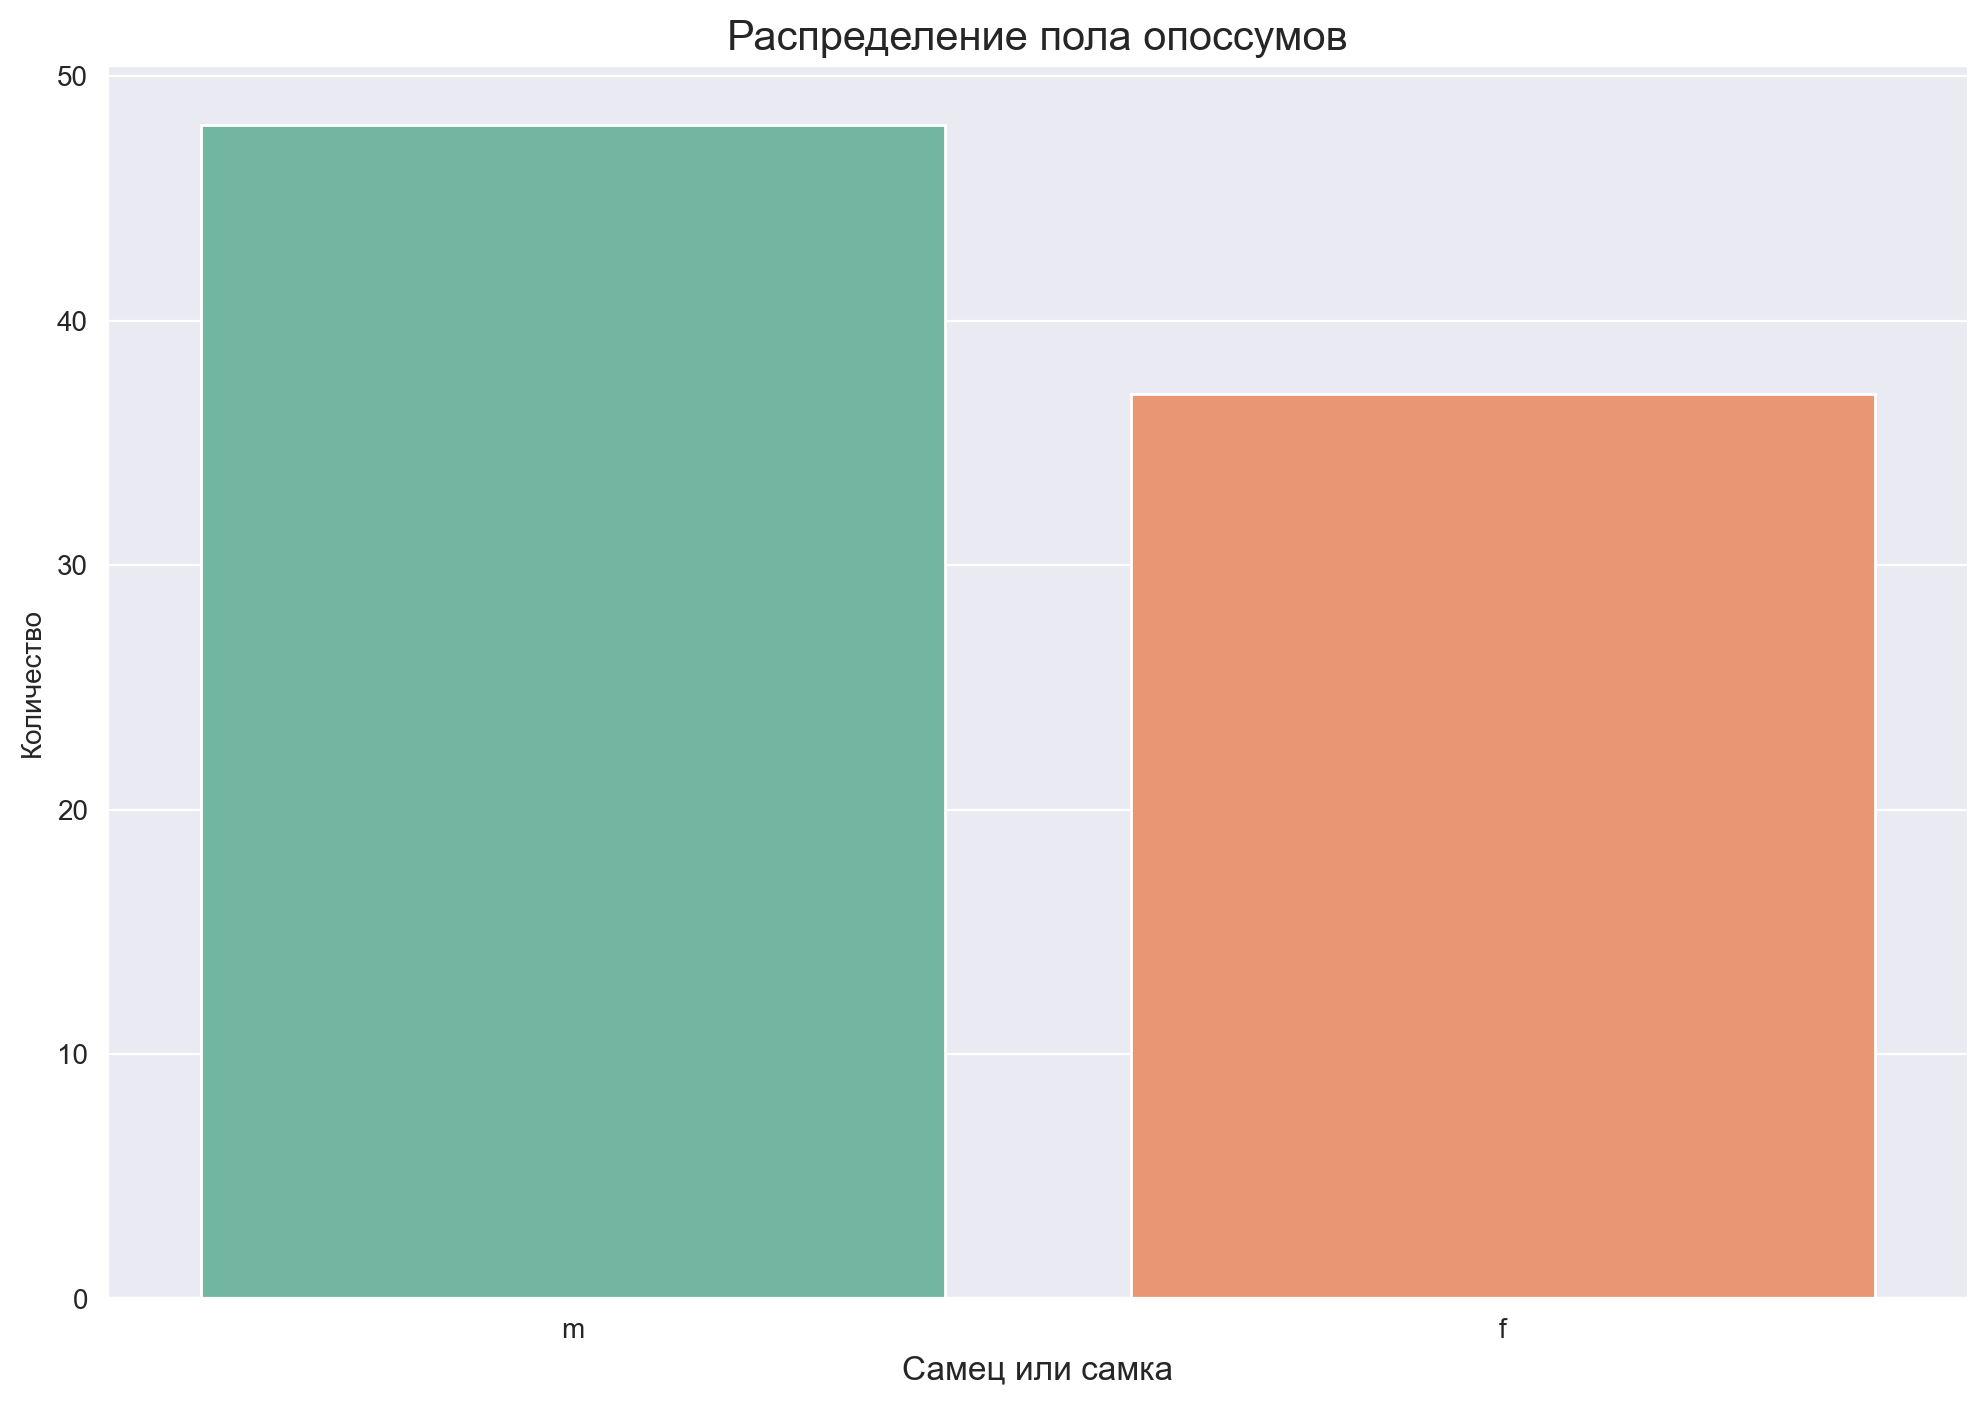

In [14]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(data=data_csv, x='sex', palette='Set2')
plt.title('Распределение пола опоссумов', fontsize=15)
plt.ylabel('Количество')
plt.xlabel('Самец или самка', fontsize=12)
plt.show()

In [15]:
pie_data = data_csv['sex'].value_counts()

In [16]:
plt.figure(figsize=(8,4),dpi=200)
plt.pie(pie_data.values, labels=['Самец', 'Самка'], autopct='%1.1f%%');
plt.title('Доли полов среди имеющихся опоссумов', fontsize=10);

# Двумерный анализ

### Диаграммы рассеяний

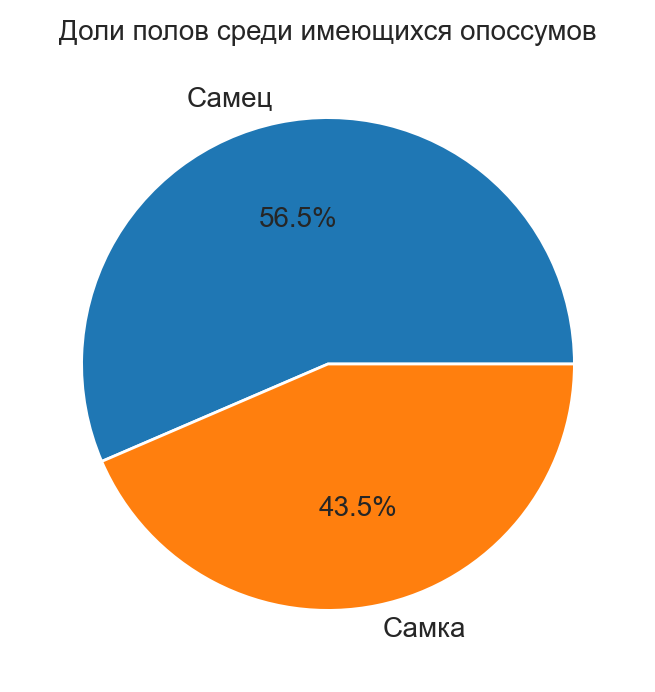

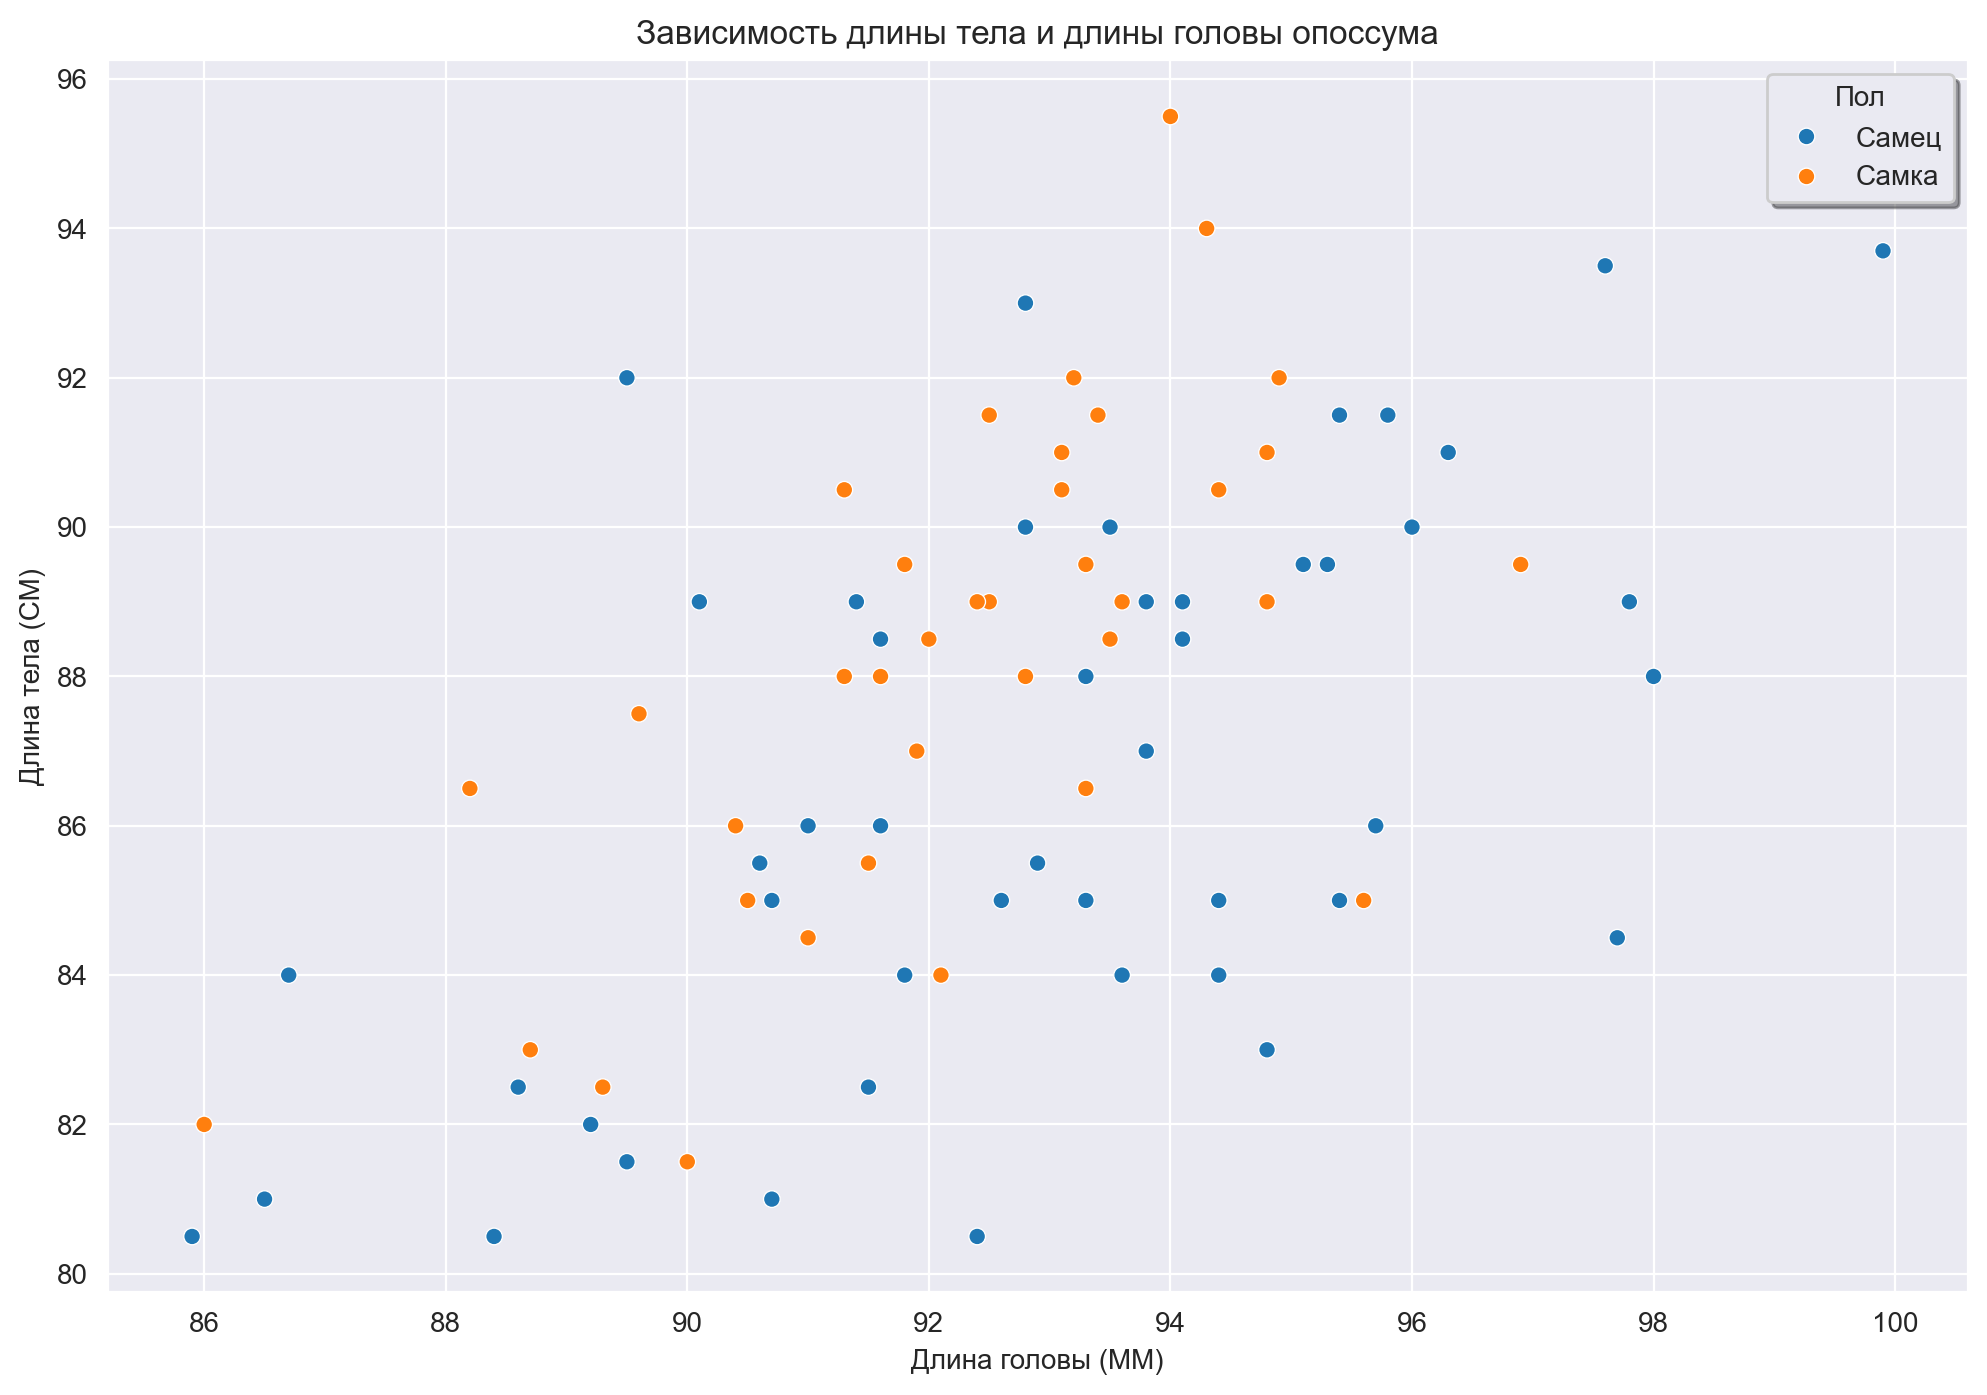

In [17]:
plt.figure(figsize=(12,8), dpi=200)
legend_map = {'m': 'Самец',
              'f': 'Самка'}
sns.scatterplot(data=data_csv, x='hdlngth', y='totlngth', hue=data_csv['sex'].map(legend_map)) 
plt.title('Зависимость длины тела и длины головы опоссума')
plt.xlabel('Длина головы (ММ)')  
plt.ylabel('Длина тела (СМ)')
plt.legend(title='Пол', shadow=True, frameon=True)
plt.show()

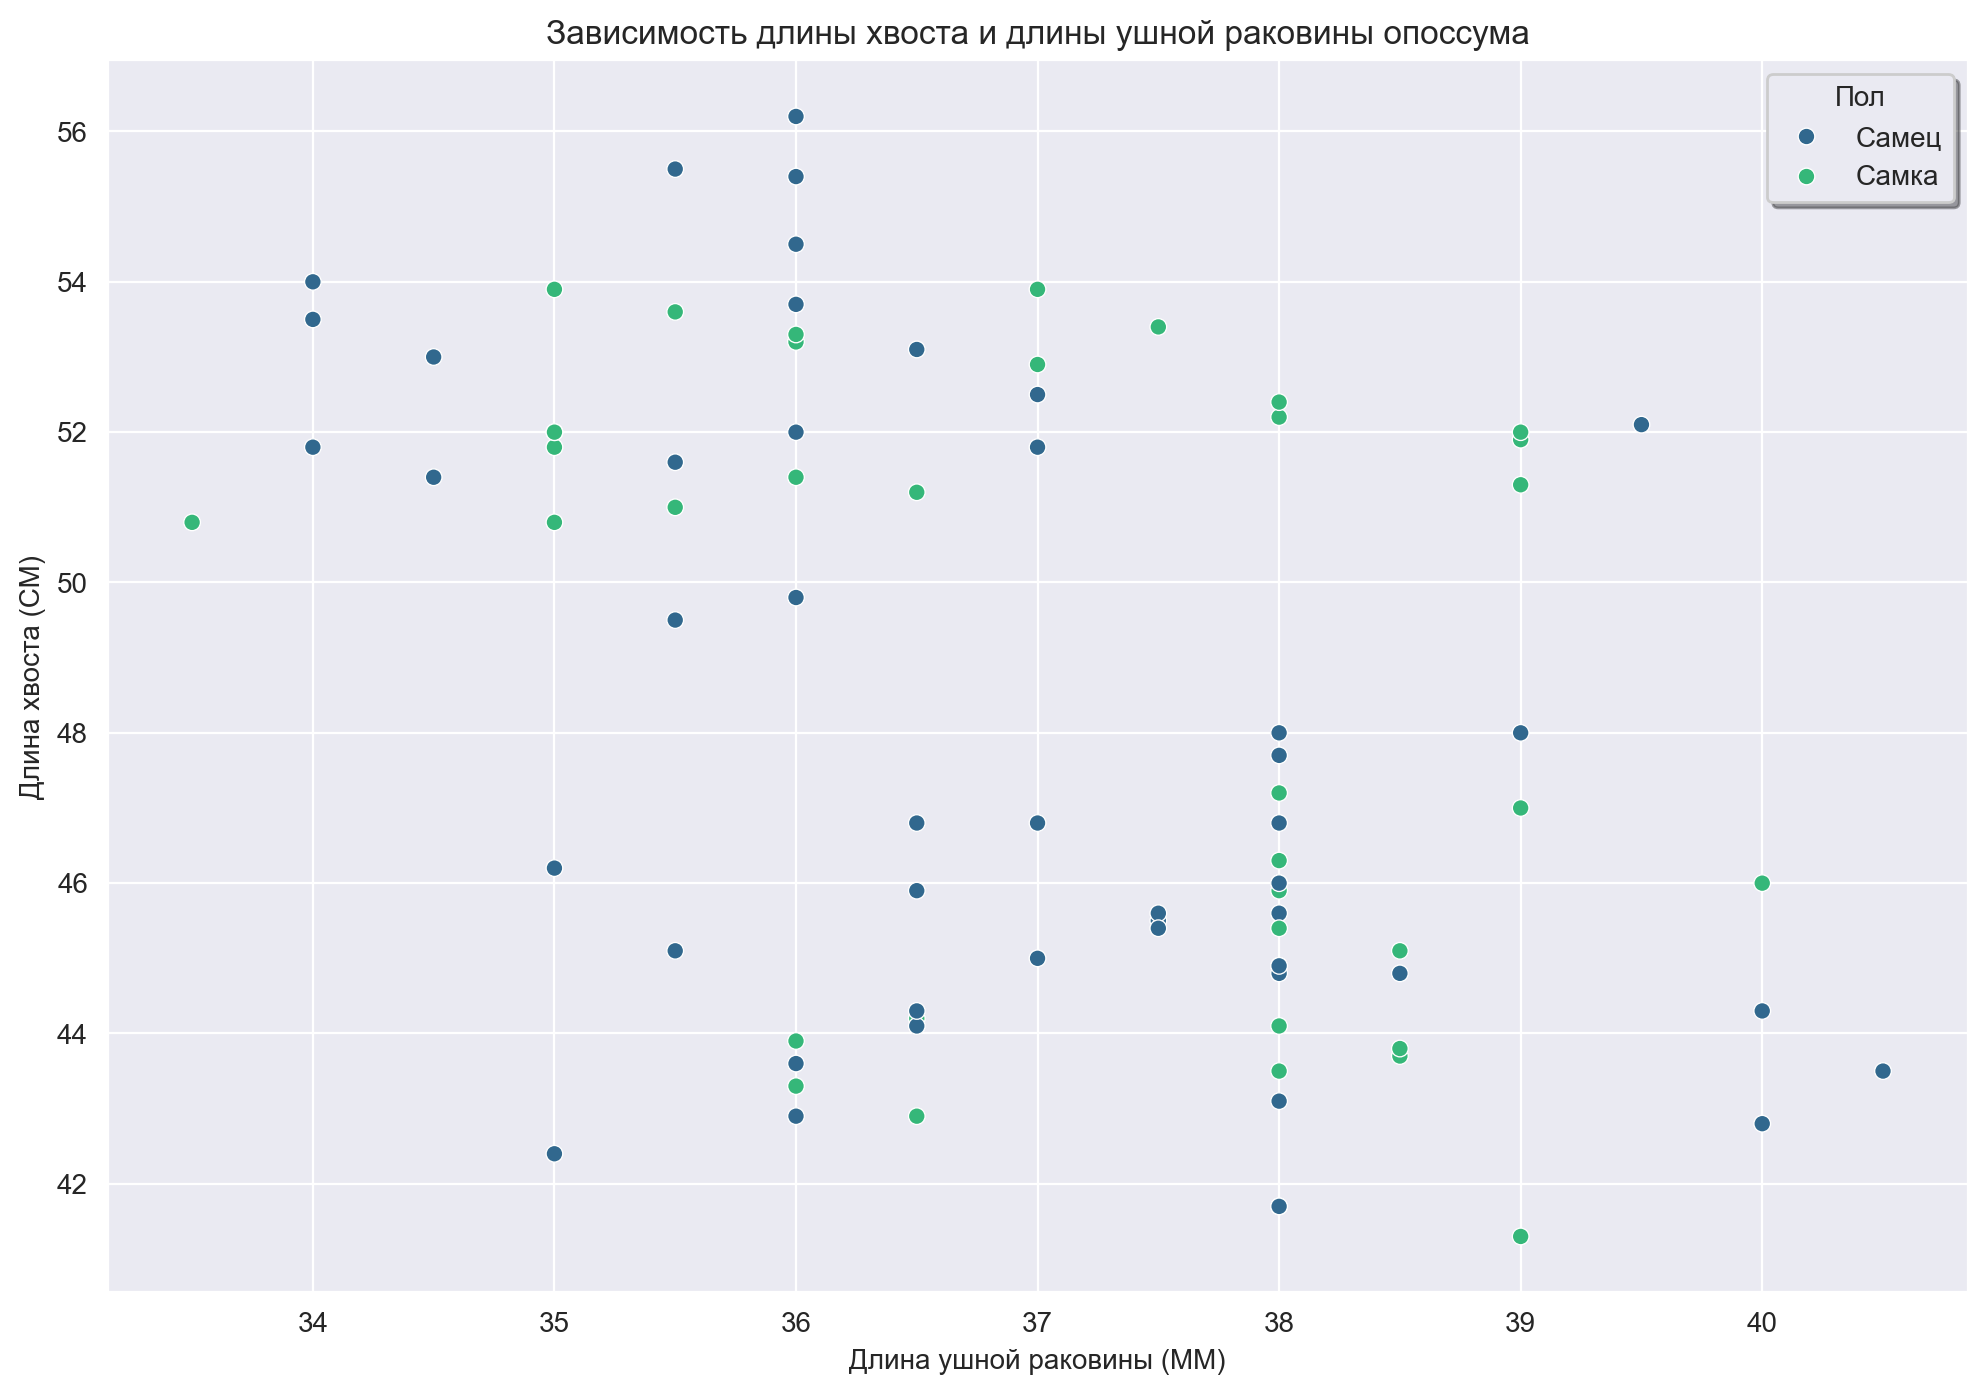

In [18]:
plt.figure(figsize=(12,8), dpi=200)
legend_map = {'m': 'Самец',
              'f': 'Самка'}
sns.scatterplot(data=data_csv, x='taill', y='earconch', hue=data_csv['sex'].map(legend_map),
               palette='viridis') 
plt.title('Зависимость длины хвоста и длины ушной раковины опоссума')
plt.xlabel('Длина ушной раковины (ММ)')  
plt.ylabel('Длина хвоста (СМ)')
plt.legend(title='Пол', shadow=True, frameon=True)
plt.show()

### Корреляции

In [19]:
print('Матрица корреляций:')
data_csv.corr()

Матрица корреляций:


,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.972901,-0.230874,-0.322675,-0.260915,-0.471386,0.379000,-0.826548,-0.801900,-0.155567,-0.491153,-0.272354
site,0.972901,1.000000,-0.167653,-0.308798,-0.224023,-0.434859,0.415411,-0.834181,-0.824622,-0.129432,-0.436329,-0.250243
age,-0.230874,-0.167653,1.000000,0.401458,0.449385,0.298692,0.081606,0.183304,0.097062,0.167061,0.408695,0.377460
hdlngth,-0.322675,-0.308798,0.401458,1.000000,0.718643,0.562747,0.044726,0.389509,0.286855,0.369768,0.530310,0.409548
skullw,-0.260915,-0.224023,0.449385,0.718643,1.000000,0.529262,0.170161,0.328597,0.150461,0.424788,0.541907,0.439157
totlngth,-0.471386,-0.434859,0.298692,0.562747,0.529262,1.000000,0.390835,0.467469,0.301029,0.211221,0.492999,0.328804
taill,0.379000,0.415411,0.081606,0.044726,0.170161,0.390835,1.000000,-0.292404,-0.453473,0.032683,0.007484,0.101922
footlgth,-0.826548,-0.834181,0.183304,0.389509,0.328597,0.467469,-0.292404,1.000000,0.849689,0.043975,0.467791,0.272944
earconch,-0.801900,-0.824622,0.097062,0.286855,0.150461,0.301029,-0.453473,0.849689,1.000000,-0.065891,0.335052,0.139949
eye,-0.155567,-0.129432,0.167061,0.369768,0.424788,0.211221,0.032683,0.043975,-0.065891,1.000000,0.183675,0.231731


### Проверка на наличие мультиколлинеарности

In [20]:
data_corr = data_csv.drop(['taill', 'Pop', 'sex', 'case'], axis=1).corr()

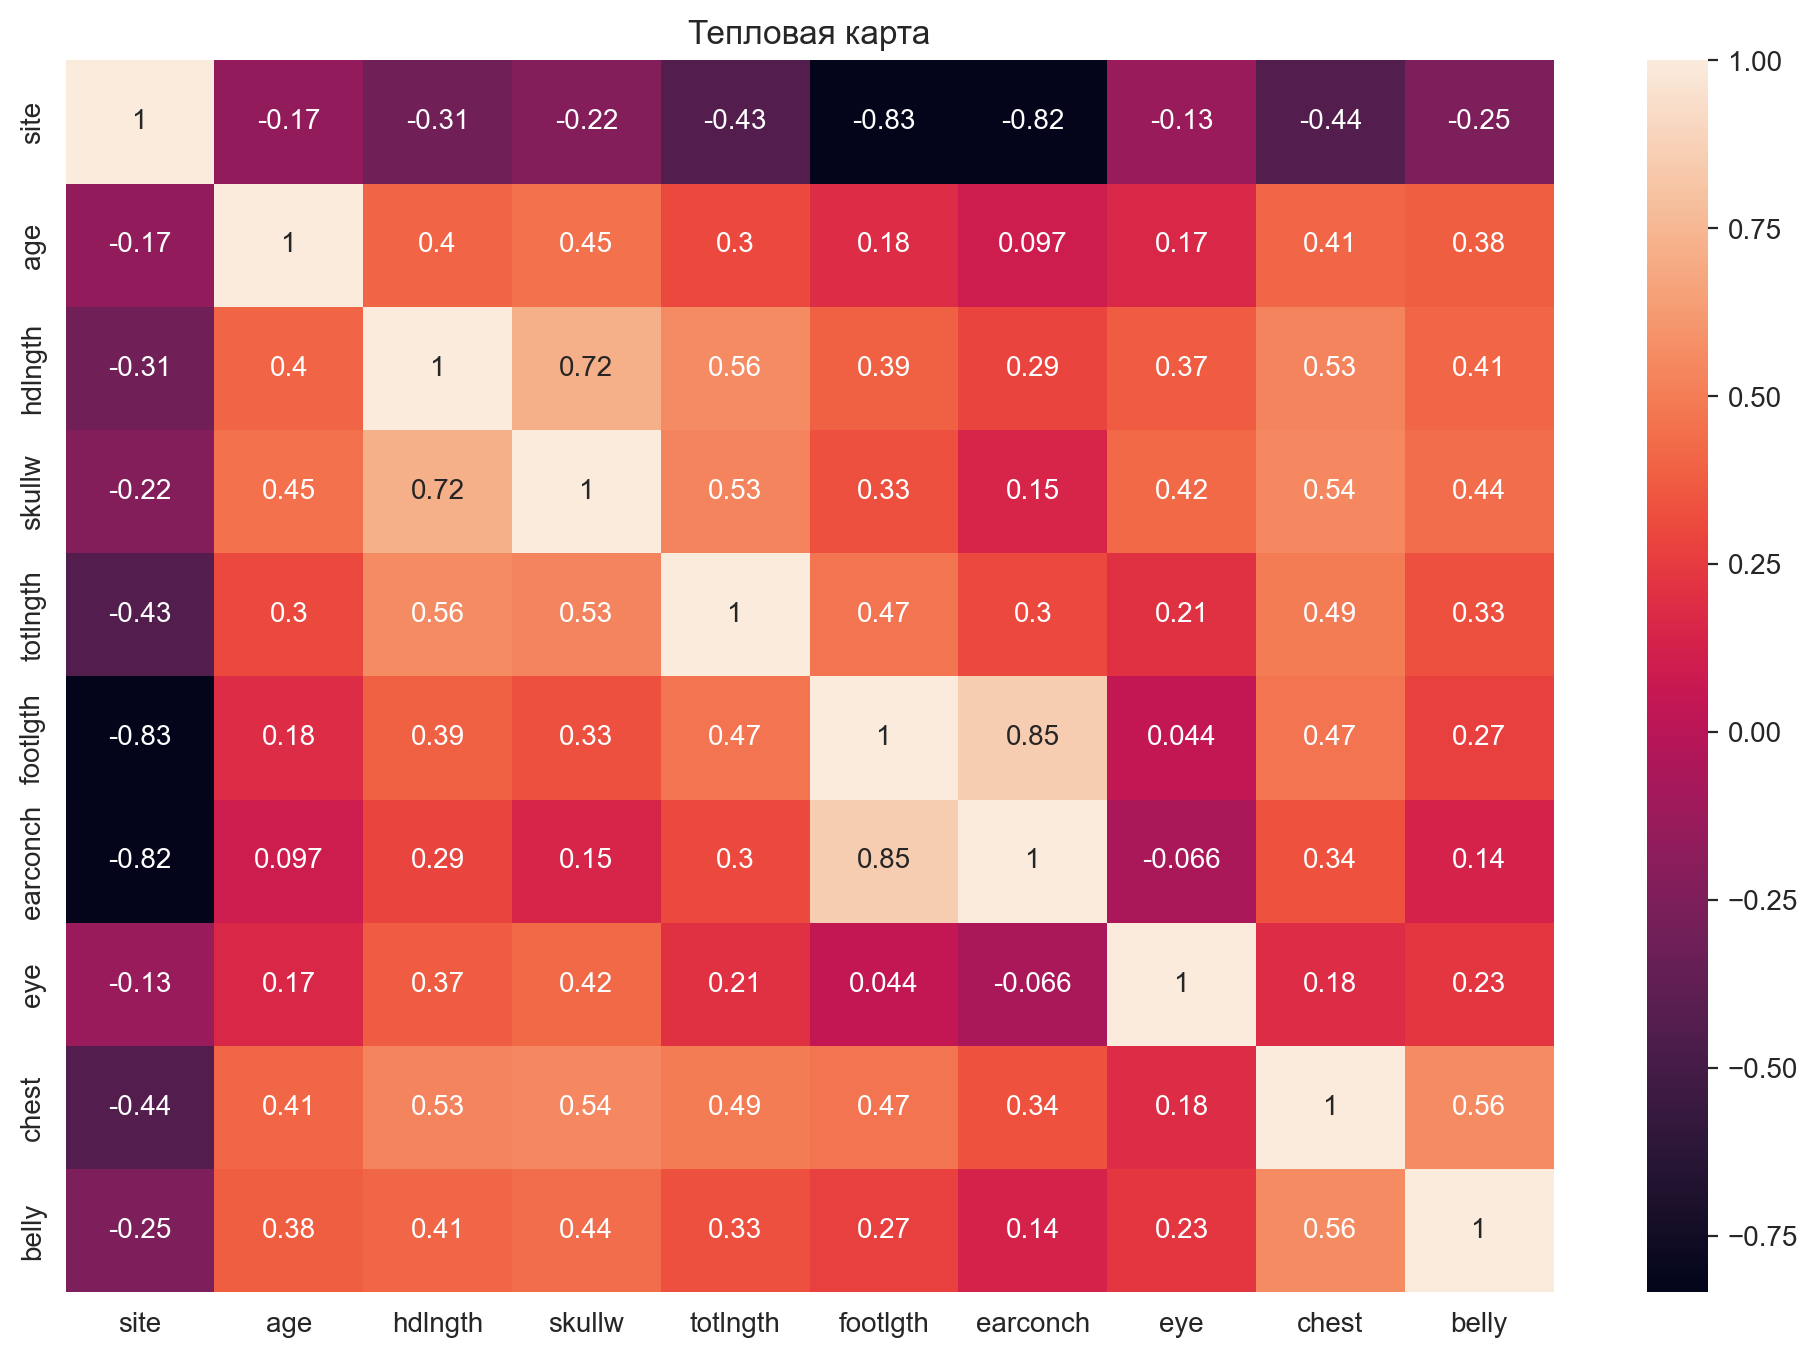

In [21]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(data=data_corr, annot=True, cmap='rocket')
plt.title('Тепловая карта')
plt.show()

**Удалим столбец earconch, так как он сильно коррелирует со столбцом footlngth и site**

In [22]:
data_csv = data_csv.drop('earconch', axis=1)

In [23]:
data_csv.shape

(85, 13)

# Подготовка данных к регрессии и обучение модели

**В качестве целевой переменной возьмём длину тела**

In [24]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', LinearRegression())
])

In [25]:
X = data_csv.drop('totlngth', axis=1)
y = data_csv[['totlngth']]

In [26]:
X['Pop'] = X['Pop'].map({'Vic': 1, 'other': 0})
X['sex'] = X['sex'].map({'m': 1, 'f': 0})

In [27]:
mse = cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_squared_error')
mae = cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_absolute_error')
r2 = cross_val_score(pipe, X, y, cv=5, scoring='r2')

In [28]:
pd.DataFrame(data=[-mse, -mae, r2, np.sqrt(-mse)], index=['MSE', 'MAE', 'R2', 'RMSE']).transpose()

,MSE,MAE,R2,RMSE
0,3.918764,1.548767,0.363930,1.979587
1,8.459115,2.509783,0.037715,2.908456
2,8.983018,2.429919,0.374080,2.997168
3,2.515806,1.274297,0.786031,1.586129
4,5.567376,1.957077,0.124607,2.359529


In [29]:
pd.DataFrame(data=[(-mse).mean(), (-mae).mean(), r2.mean(), (np.sqrt(-mse)).mean()], 
             index=['MSE', 'MAE', 'R2', 'RMSE'],
             columns=['Среднее значение'])

,Среднее значение
MSE,5.888816
MAE,1.943969
R2,0.337273
RMSE,2.366174


# Коэффициенты регрессии

In [38]:
pipe.fit(X, y)

coefficients = pipe.named_steps['model'].coef_
intercept = pipe.named_steps['model'].intercept_

In [59]:
params = {}
count = 0
for col in X.columns:
    params[col] = coefficients[0][count]
    count += 1
pd.DataFrame(data=params.values()).transpose().rename(columns=pd.Series(params.keys()), 
                                                      index=pd.Series('Коэффициент обучения'))

,case,site,Pop,sex,age,hdlngth,skullw,taill,footlgth,eye,chest,belly
Коэффициент обучения,-1.426603,-0.505616,-0.279218,-0.331317,-0.113039,1.159616,0.284442,2.012064,0.352262,-0.075315,0.175323,-0.285199


In [61]:
print(f'Коэффициент пересечения: {intercept[0]}')

Коэффициент пересечения: 87.26117647058824


In [66]:
preds = pipe.named_steps['model'].predict(X)

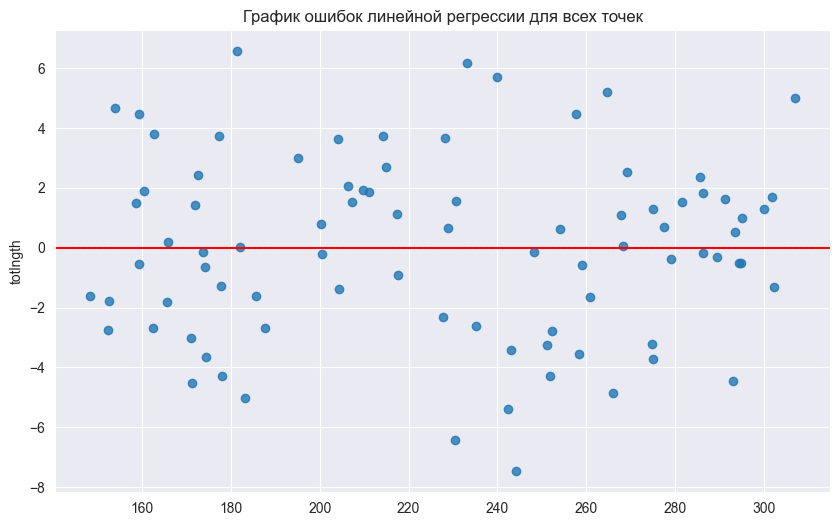

In [69]:
plt.figure(figsize=(10,6), dpi=100)
sns.residplot(x=preds, y=y);
plt.axhline(y=0, color='r');
plt.title('График ошибок линейной регрессии для всех точек');
plt.show()